In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: 0886070601_M225grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.958e-03 +/- 3.639e-04 (61.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-5
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 2.636e+04 sec
 Using fit statistic: chi
 Using Background File                0886070601_M225spec_bkg.fits
  Background Exposure Time: 2.636e+04 sec
 Using Response (RMF) File            0886070601_M225spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886070601_M225spec.arf



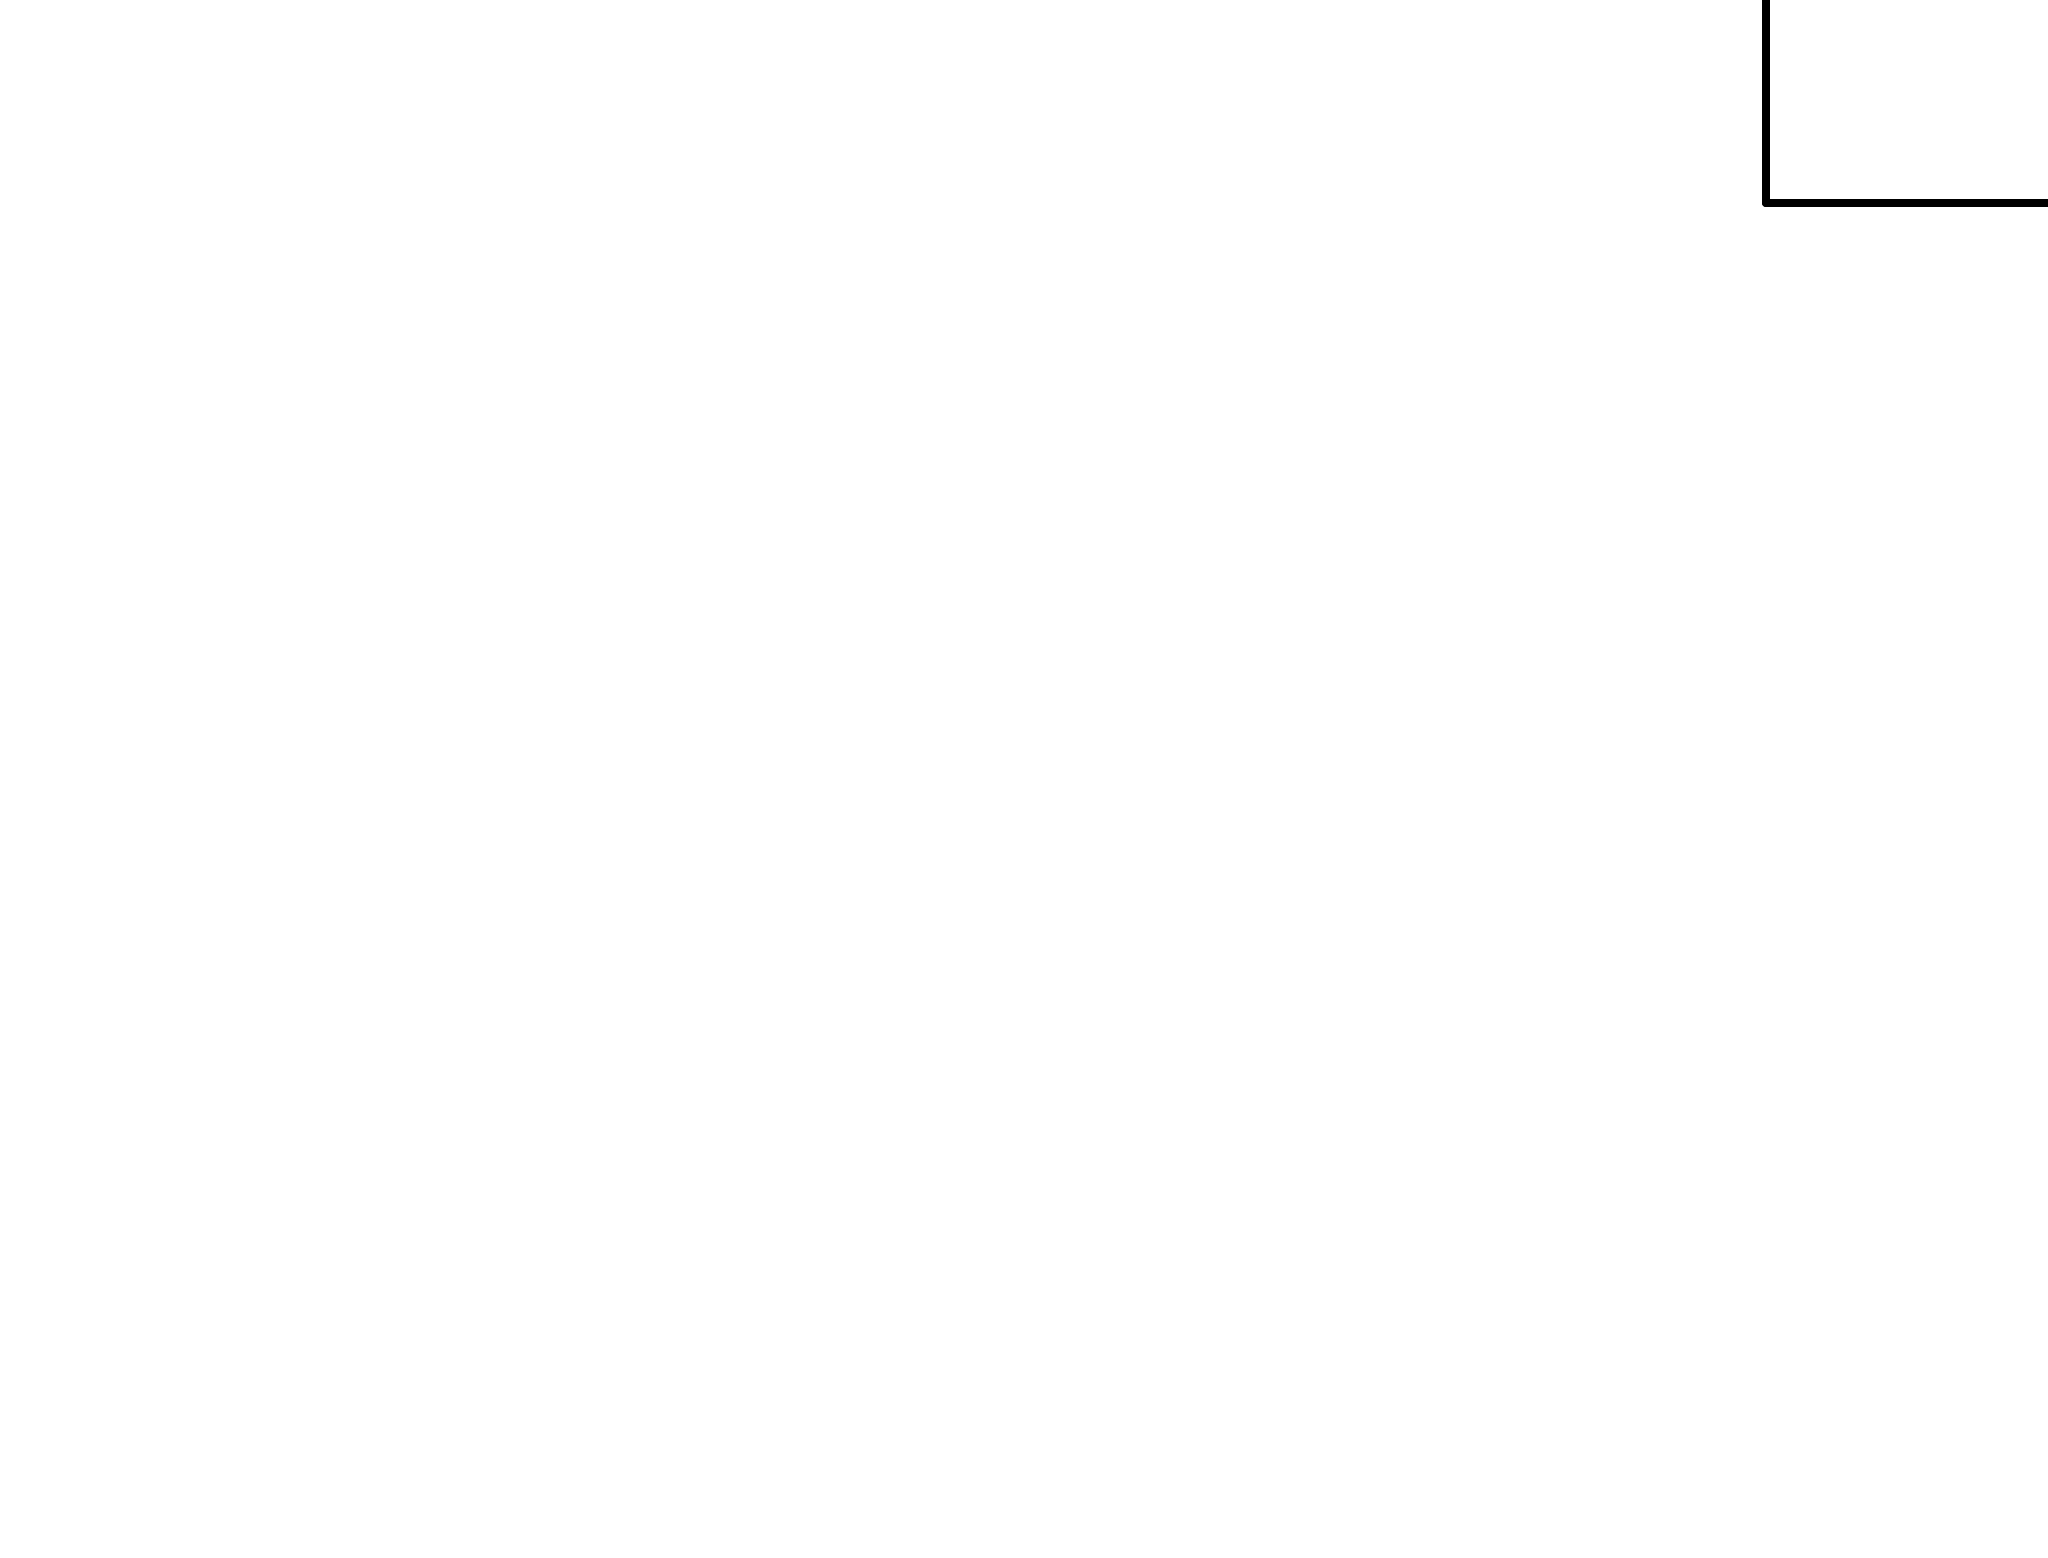

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



In [2]:
spec_fnames = glob.glob('*grpspec*')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              6.654989e+12     using 4 bins.

Tes

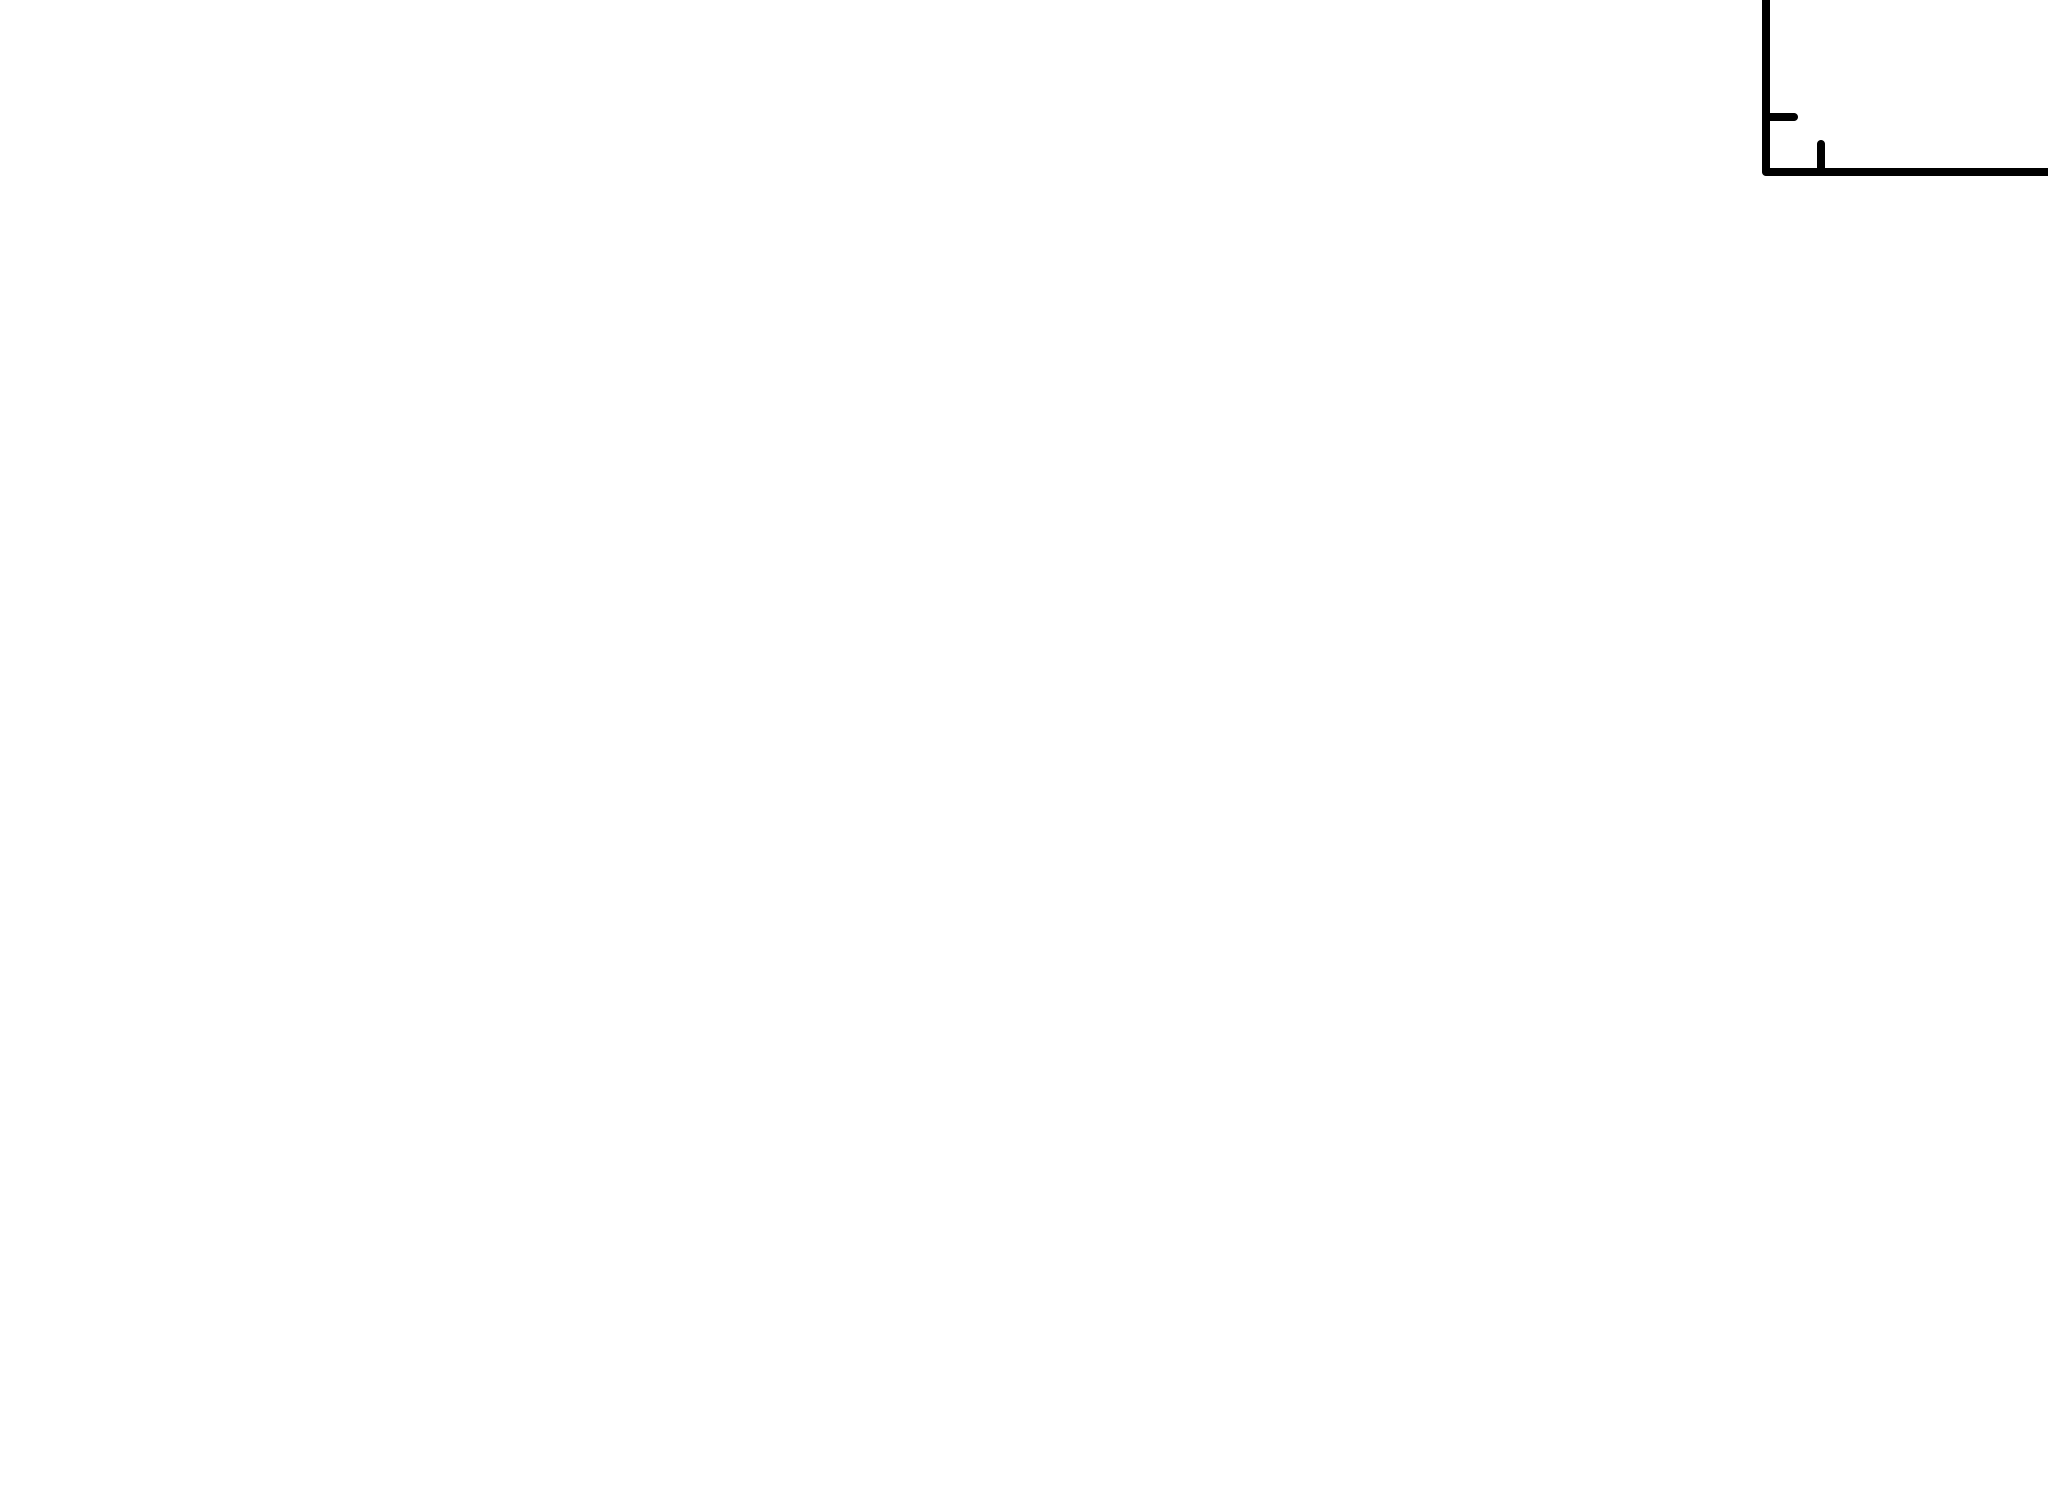

In [3]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.940079e+11     using 4 bins.

Test statistic : Chi-Squared              1.940079e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
7.17217      1.02721      -1      0.405037       6.43148   5.73558e-06
6.39304      252247       -1      0.192712       9.25060   4.64867e-06
4.78291      363783       -1     0.0219258       15.2843   4.52126e-06
4.3

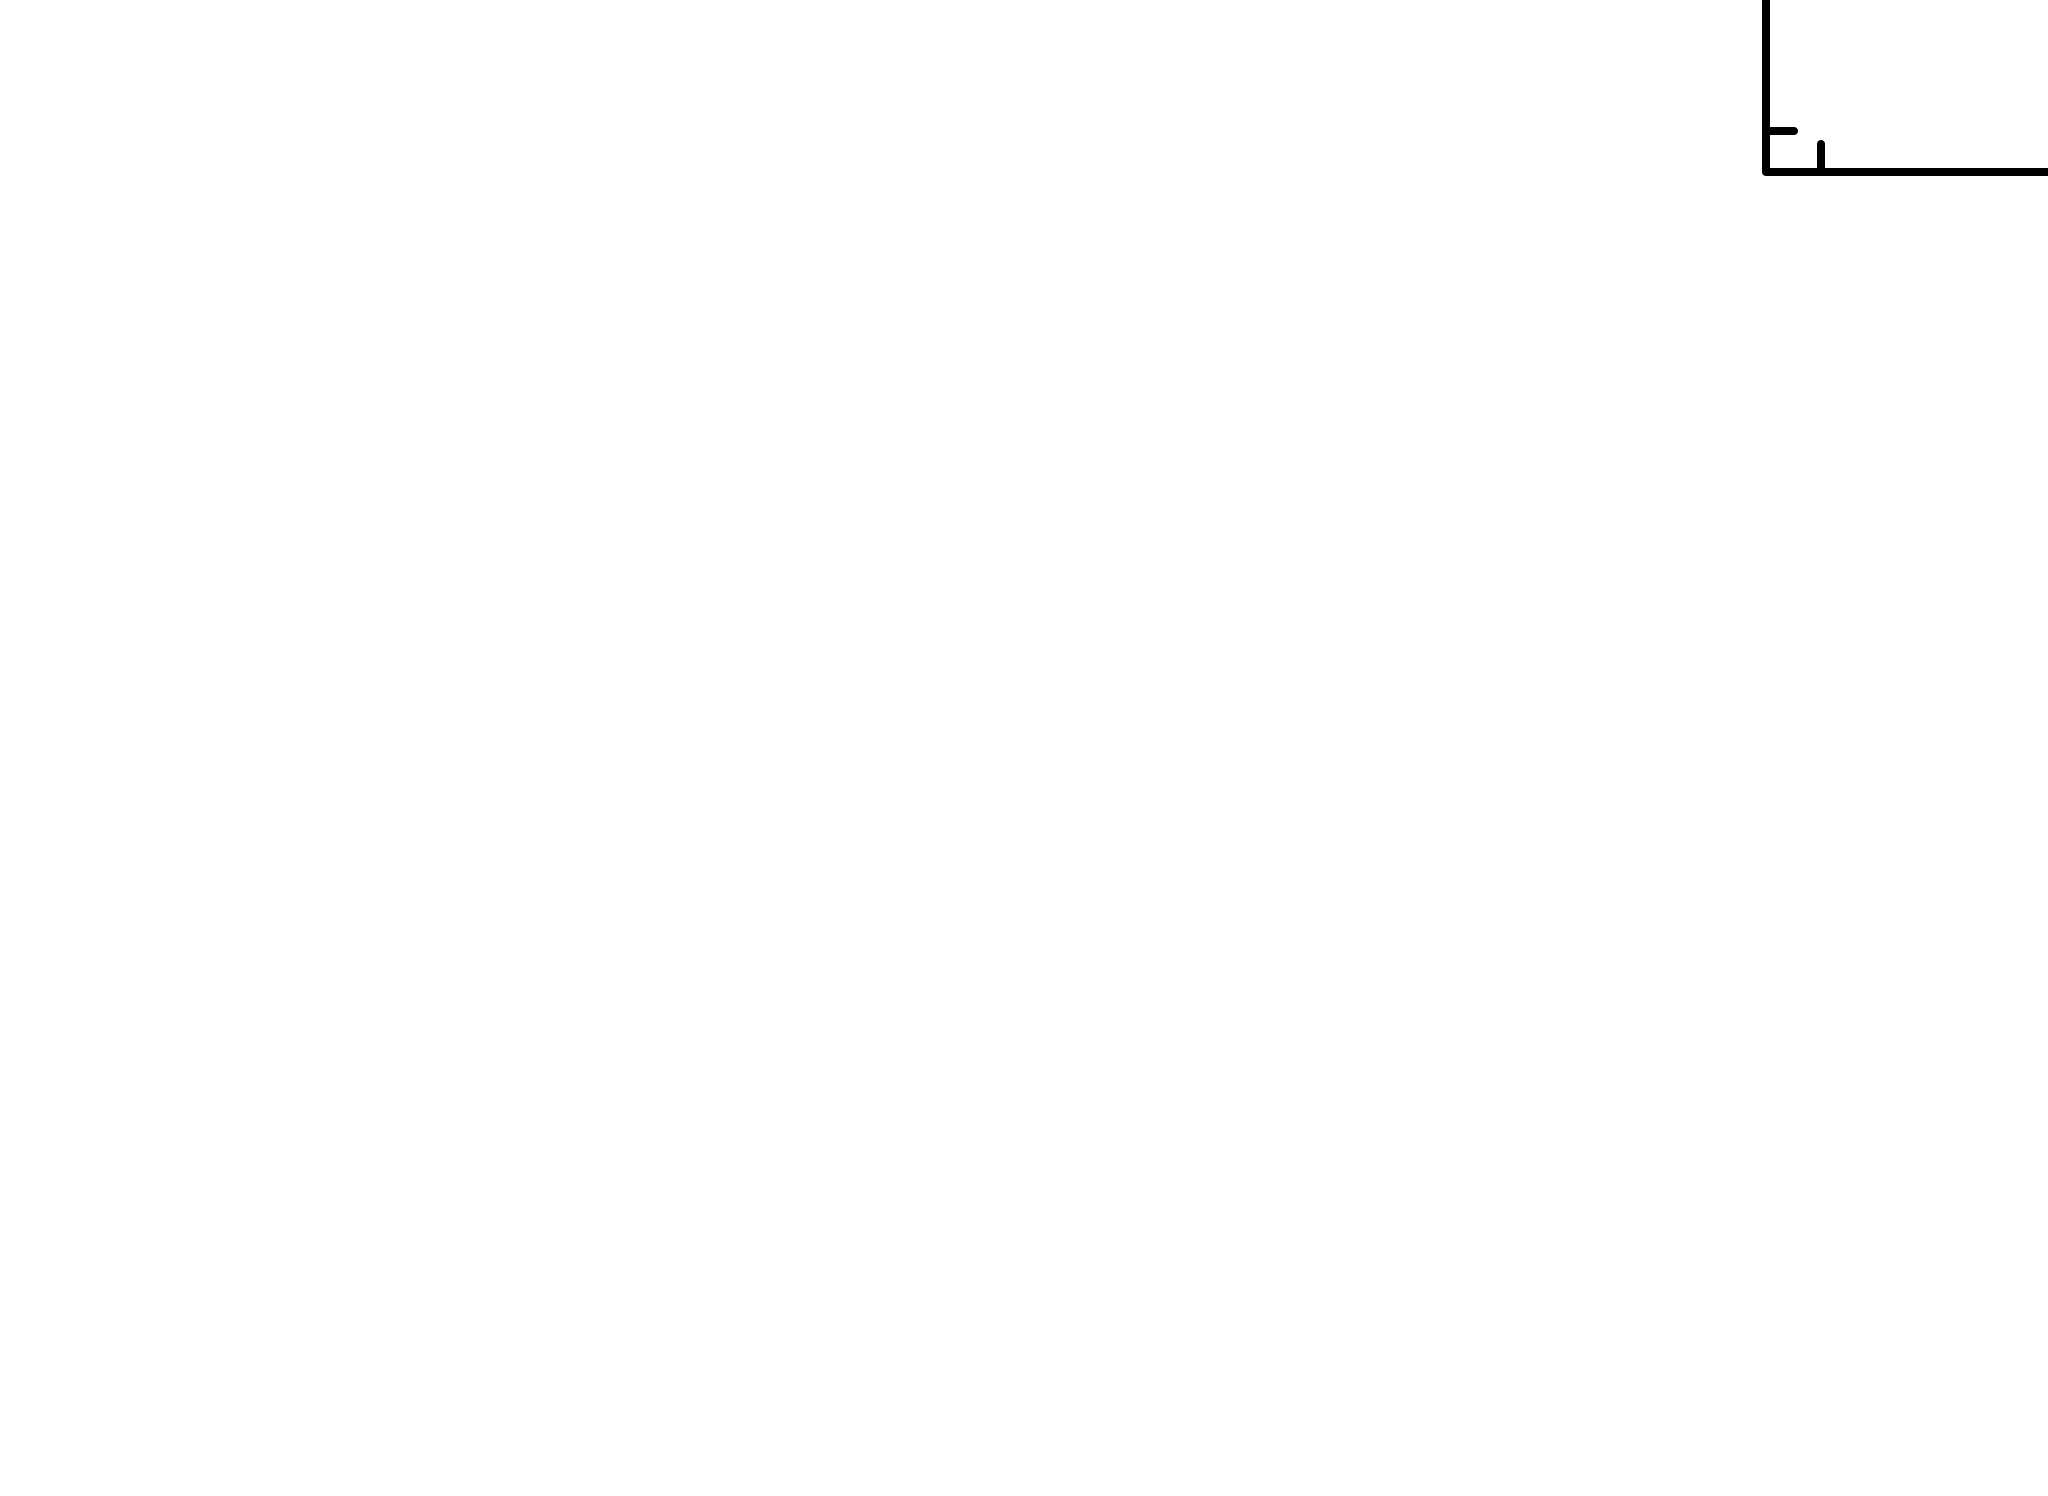

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.696664e+10     using 4 bins.

Test statistic : Chi-Squared              2.696664e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
3.08833      0.282881     -1      0.954079       1.04871   2.7

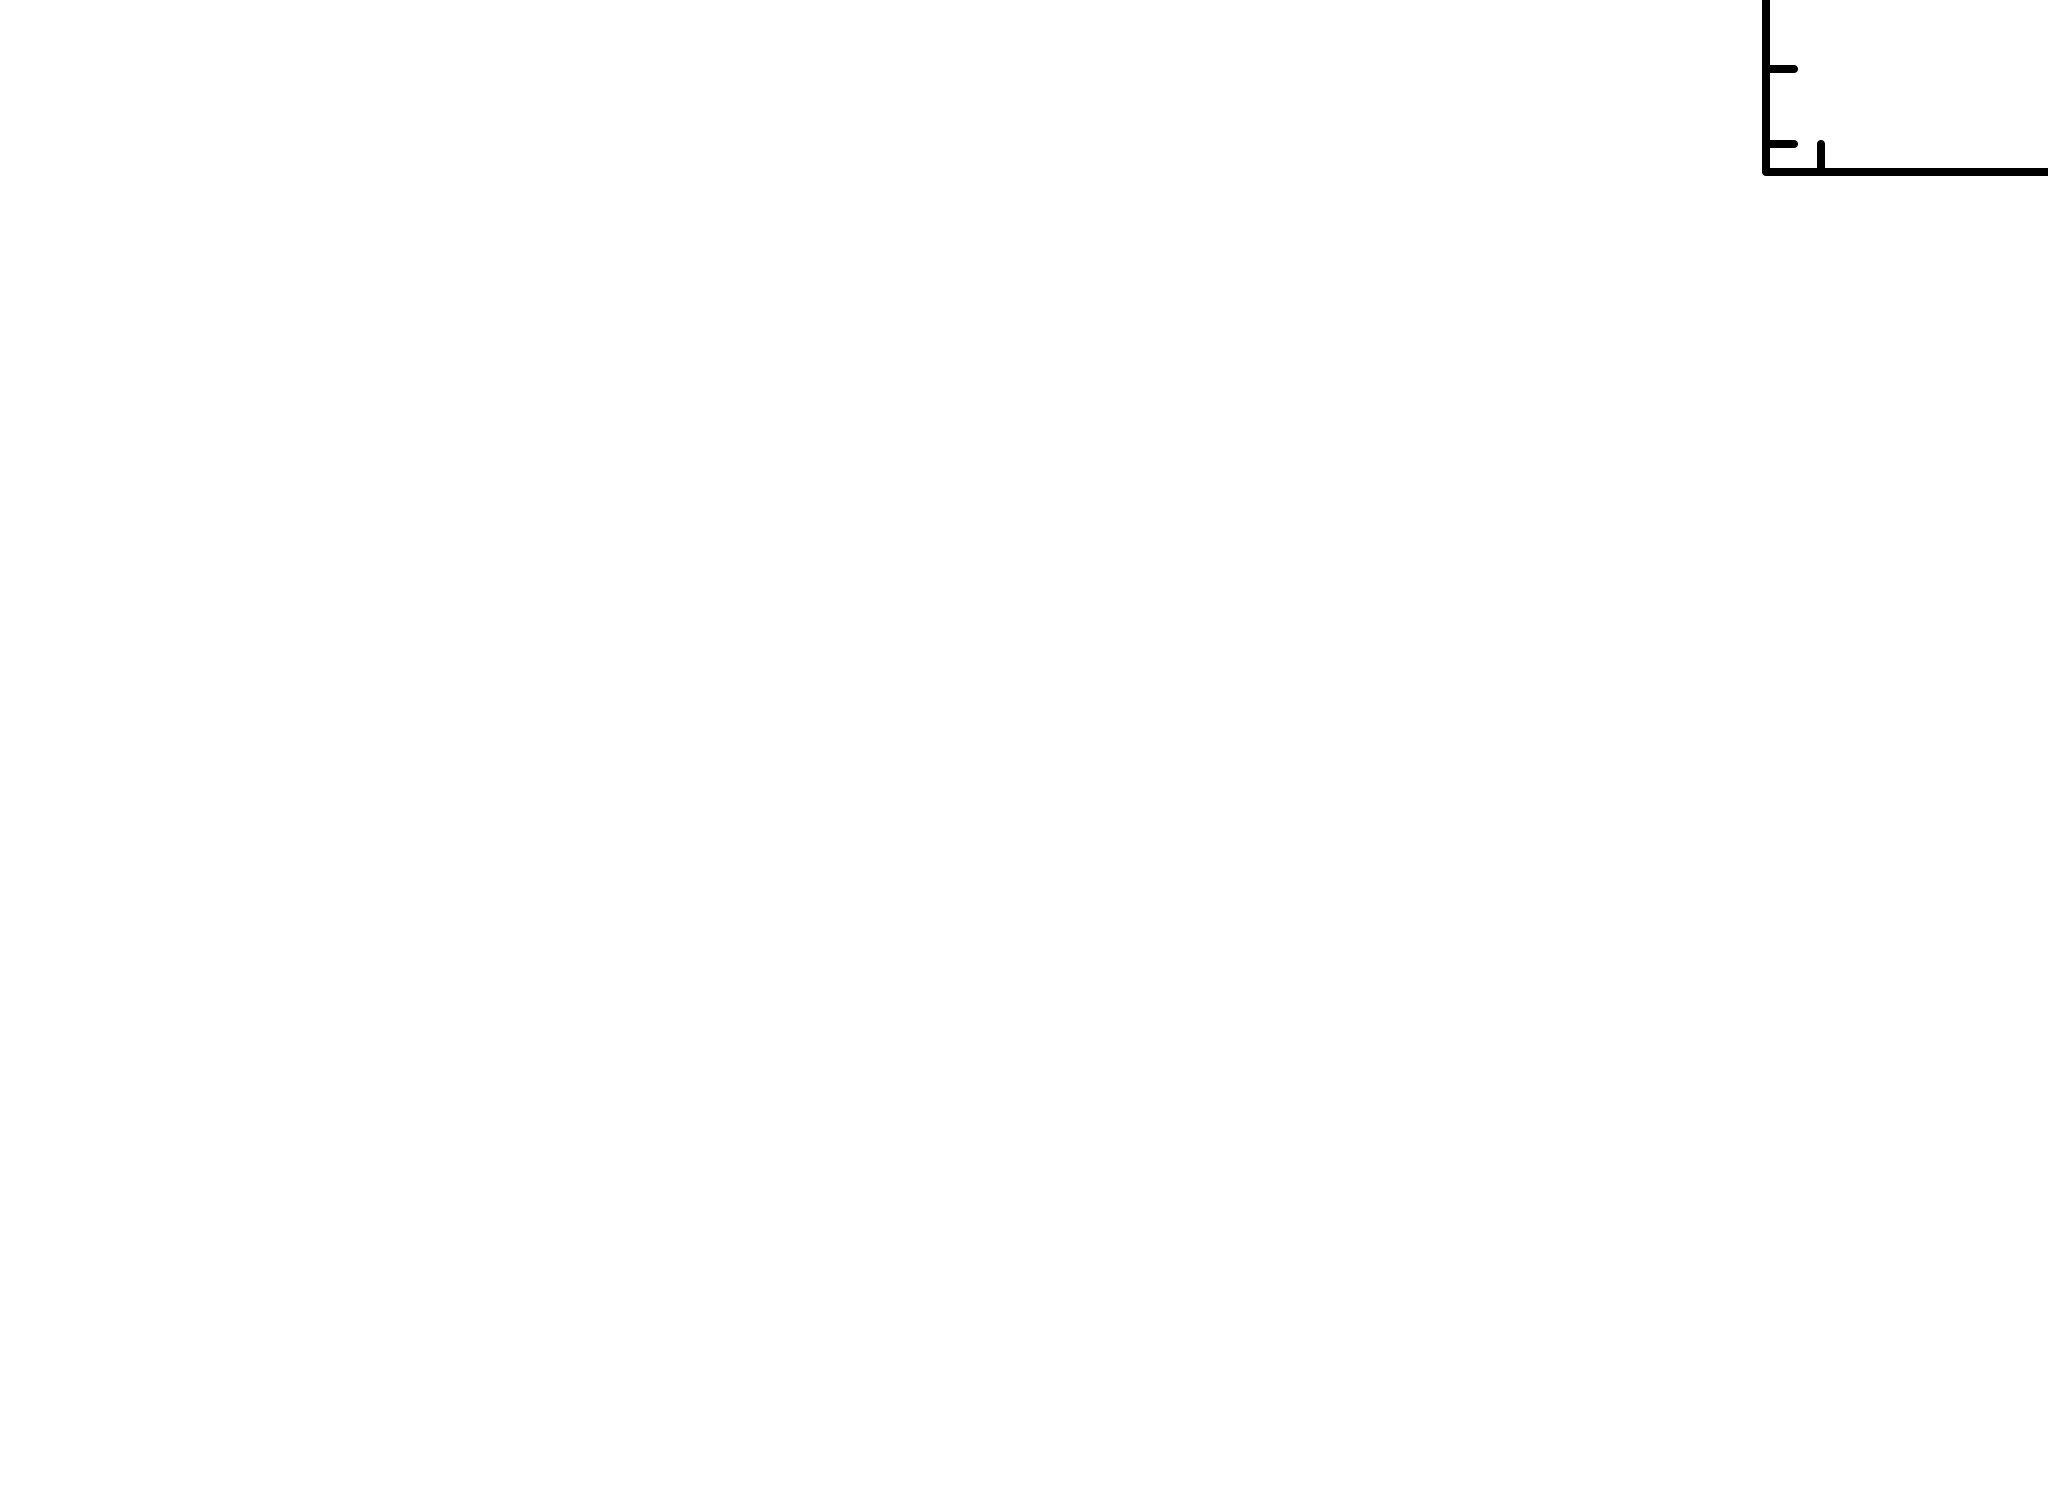

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.367176e+12     using 4 bins.

Test statistic : Chi-Squared              1.367176e+12     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
11.4212      1.3366       -2     0.0403749      0.624720   1.18268e-06
10.6688      1.07238e+06  -1     0.0145325      0.820711   1.32930e-06
9.77581      1.20038e+06  -2    0.00275326      0.918607   1.49181e-06
9

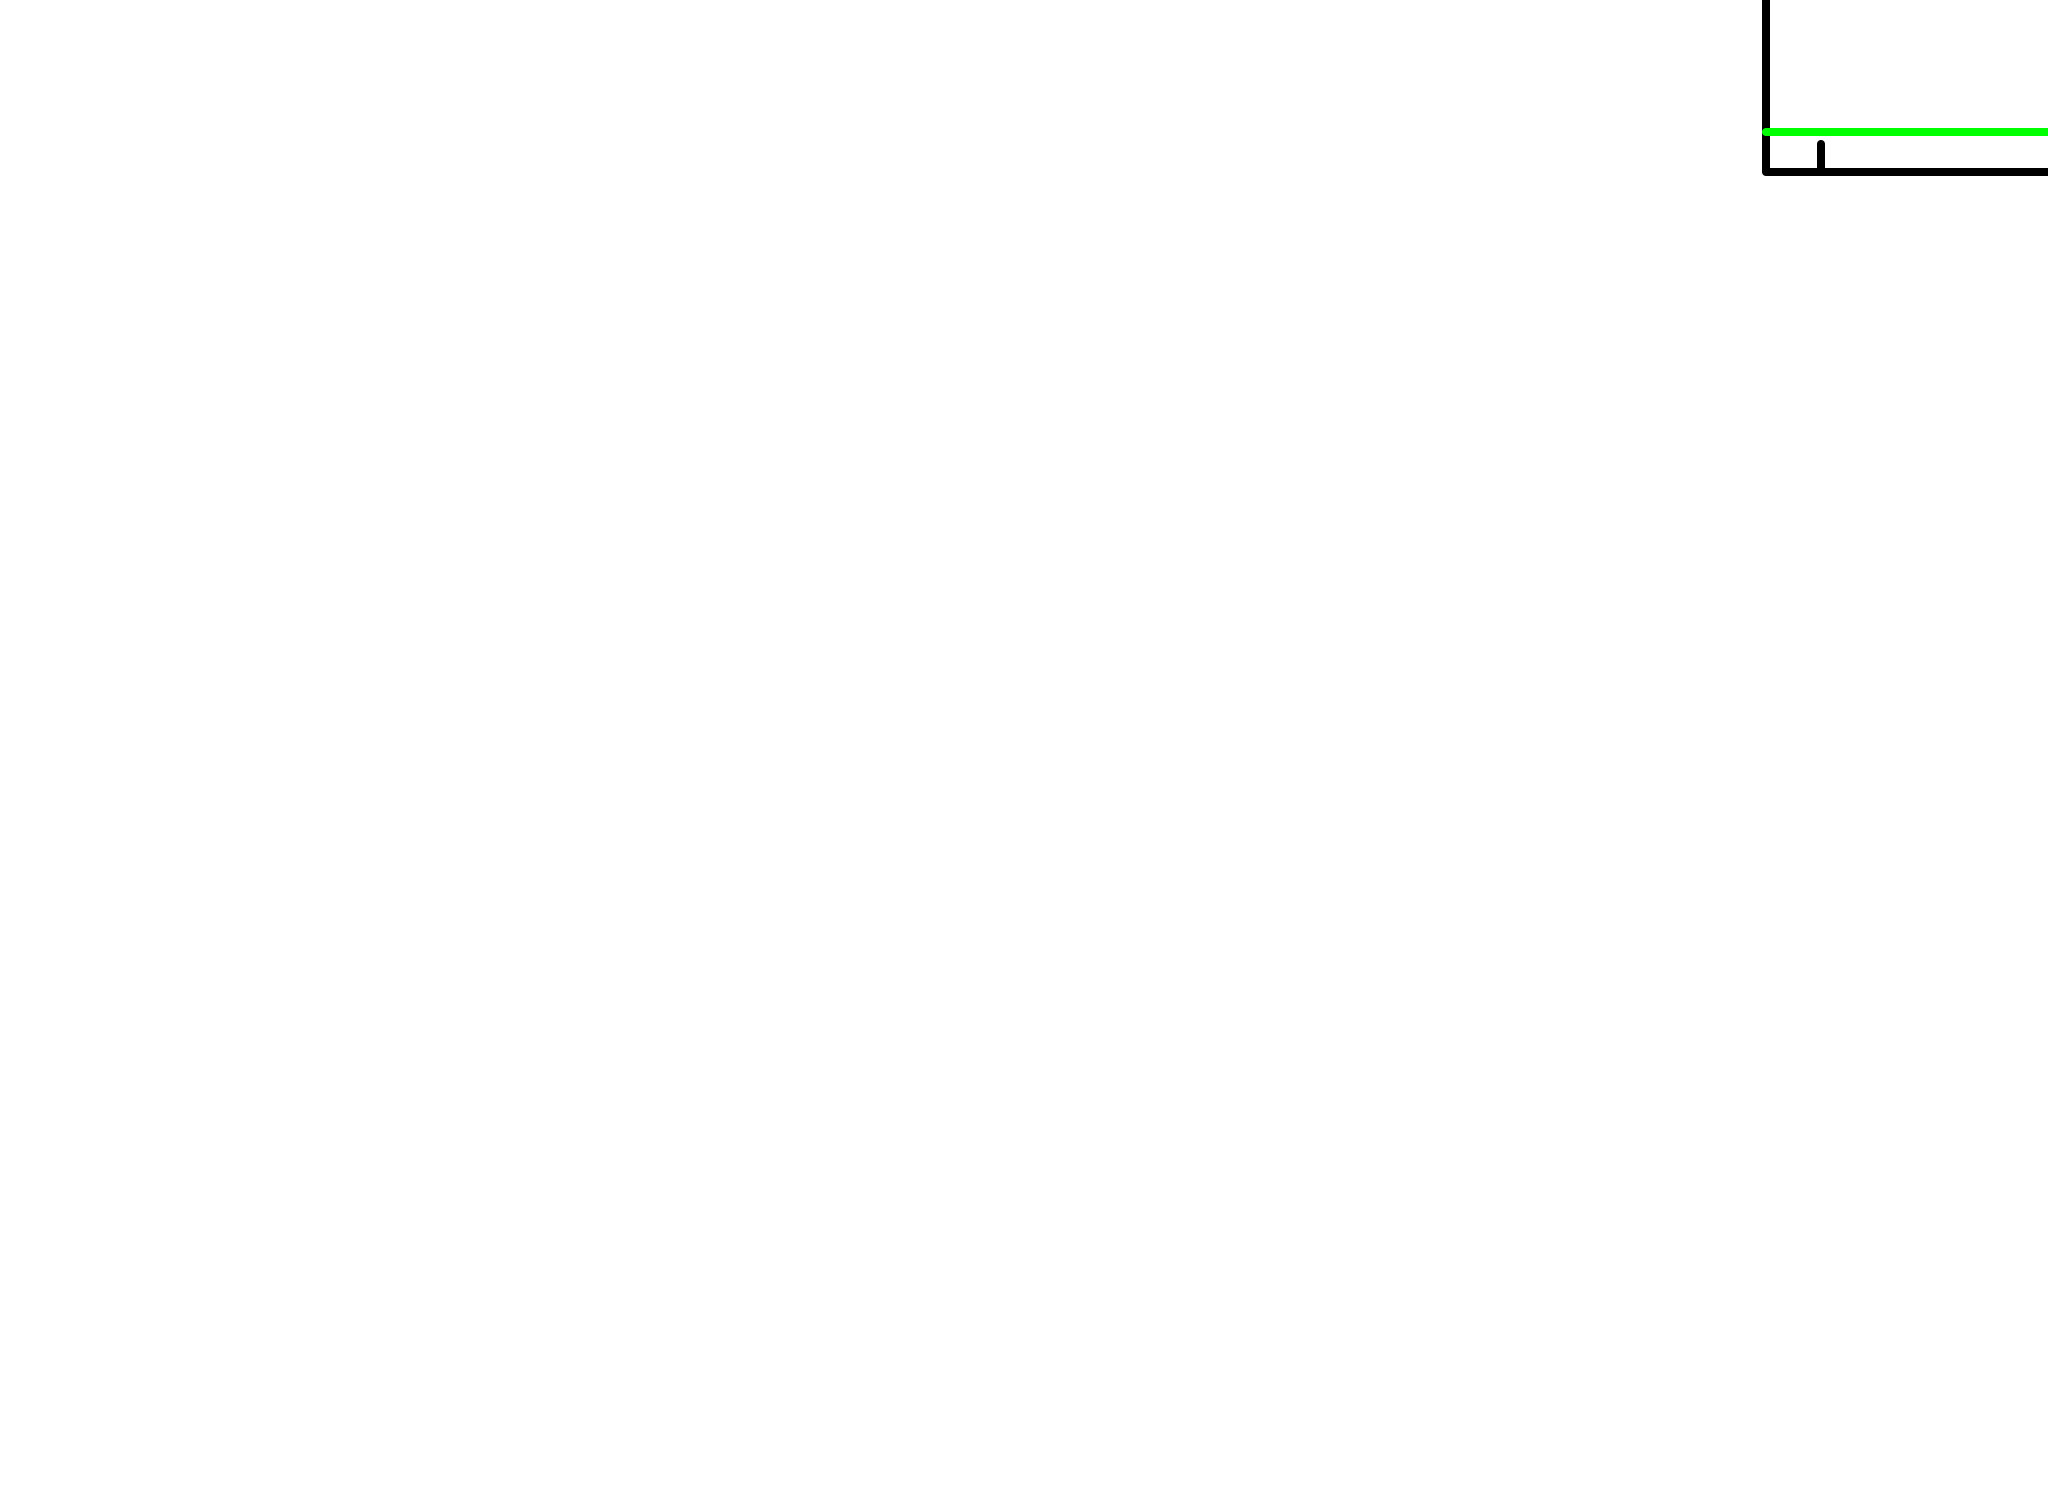

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 6.4579e-06 photons (3.2957e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
plx = 2.3643
d_kpc = 1/plx
F_x = 3.0597*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

6.547193324767156e+29


In [9]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

0.4229581694370427
29.816055164908555


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*13.65)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  3.6407369297515754e-11
F_x / F_opt:  -3.0755104525660277
